# 01. Fondamentaux du Workflow PyTorch

L'essence du maching learning et du depp learning est de prendre des données du passé, de construire un algorithme (comme un réseau de neurones) pour y découvrir des motifs, puis d'utiliser ces motifs découverts pour prédire l'avenir.

Il existe de nombreuses façons de procéder et de nouvelles méthodes sont découvertes en permanence.

Mais commençons petit.

Que diriez-vous de commencer par une ligne droite ?

Voyons si nous pouvons construire un modèle PyTorch qui apprend le motif de la ligne droite et l'ajuste.

## Ce que nous allons couvrir

Dans ce module, nous allons explorer un workflow standard de PyTorch (il peut être modifié selon les besoins, mais il couvre les principales étapes).

Pour l'instant, nous utiliserons ce workflow pour prédire une simple ligne droite, mais les étapes du workflow peuvent être répétées et adaptées en fonction du problème traité.

En détail, nous allons couvrir :

| **Sujet** | **Contenu** |
| ----- | ----- |
| **1. Préparation des données** | Les données peuvent être presque n'importe quoi, mais pour commencer, nous allons créer une simple ligne droite. |
| **2. Construction du modèle** | Nous allons créer un modèle pour apprendre les motifs des données, choisir une **fonction de perte**, un **optimiseur** et construire une **boucle d'entraînement**. |
| **3. Entraînement du modèle** | Nous avons des données et un modèle, voyons si le modèle peut trouver des motifs dans les données d'entraînement. |
| **4. Prédictions et évaluation du modèle** | Le modèle a trouvé des motifs dans les données, nous allons comparer ses résultats aux données de test. |
| **5. Sauvegarde et chargement du modèle** | Il peut être utile d'enregistrer notre modèle pour une utilisation future. |
| **6. Mise en œuvre complète** | Nous allons rassembler toutes les étapes précédentes et les combiner. |

## Où obtenir de l'aide ?

Tout le matériel de ce cours est [disponible sur GitHub](https://github.com/AbdelhakSamir/pytorch-deep-learning).

Et si vous rencontrez un problème, vous pouvez poser les questions sur la [page Discussions](https://github.com/AbdelhakSamir/pytorch-deep-learning/discussions).

Il y a aussi les [forums des développeurs PyTorch](https://discuss.pytorch.org/), un endroit très utile pour tout ce qui concerne PyTorch.

Commençons par créer un dictionnaire contenant les étapes du workflow pour référence.



In [ ]:
what_were_covering = {
    1: "préparer et charger les données",
    2: "construire le modèle",
    3: "ajuster le modèle aux données (entraînement)",
    4: "faire des prédictions et évaluer le modèle (inférence)",
    5: "sauvegarder et charger un modèle",
    6: "tout mettre ensemble"
}


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Données (préparation et chargement)

Je veux insister sur le fait que les "données" en apprentissage automatique peuvent être presque tout ce que vous pouvez imaginer. Un tableau de nombres (comme un grand fichier Excel), des images de toutes sortes, des vidéos (YouTube regorge de données !), des fichiers audio comme des chansons ou des podcasts, des structures de protéines, du texte et bien plus encore.

![L'apprentissage automatique est un jeu en deux parties : 1. transformer vos données en un ensemble représentatif de nombres et 2. construire ou choisir un modèle pour apprendre cette représentation aussi précisément que possible]

L'apprentissage automatique est un jeu en deux parties :
1. Transformer vos données, quelle qu'elles soient, en nombres (une représentation).
2. Construire ou choisir un modèle pour apprendre cette représentation aussi précisément que possible.

Parfois, ces deux étapes peuvent être réalisées simultanément.

Mais que faire si vous n'avez pas de données ?

Eh bien, c'est précisément notre situation actuelle.

Nous n'avons pas de données.

Mais nous pouvons en créer.

Nous allons créer nos données sous la forme d'une ligne droite.

Nous utiliserons la [régression linéaire](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) pour générer des données avec des **paramètres connus** (des valeurs qui peuvent être apprises par un modèle), puis nous utiliserons PyTorch pour voir si nous pouvons construire un modèle capable d'estimer ces paramètres à l'aide de la [**descente de gradient**](https://fr.wikipedia.org/wiki/Descente_de_gradient).

Ne vous inquiétez pas si ces termes vous semblent flous pour l'instant, nous allons les voir en action et je fournirai des ressources supplémentaires pour approfondir ces concepts.


In [ ]:
weight = 0.7
bias = 0.3

start = 0
end= 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Magnifique ! Maintenant, nous allons avancer vers la construction d'un modèle capable d'apprendre la relation entre `X` (**caractéristiques**) et `y` (**étiquettes**).


### Diviser les données en ensembles d'entraînement et de test

Nous avons maintenant des données.

Mais avant de construire un modèle, nous devons les diviser.

L'une des étapes les plus importantes d'un projet d'apprentissage automatique est la création d'un ensemble d'entraînement et d'un ensemble de test (et, si nécessaire, un ensemble de validation).

Chaque partition des données a un rôle précis :

| **Partition** | **Rôle** | **Proportion des données totales** | **Fréquence d'utilisation** |
| ----- | ----- | ----- | ----- |
| **Ensemble d'entraînement** | Le modèle apprend à partir de ces données (comme les cours que vous étudiez durant le semestre). | ~60-80% | Toujours |
| **Ensemble de validation** | Le modèle est ajusté sur ces données (comme un examen blanc avant l'examen final). | ~10-20% | Souvent mais pas toujours |
| **Ensemble de test** | Le modèle est évalué sur ces données pour tester ce qu'il a appris (comme l'examen final à la fin du semestre). | ~10-20% | Toujours |

Pour l’instant, nous allons nous limiter à un ensemble d'entraînement et un ensemble de test. Cela signifie que nous aurons un ensemble de données sur lequel notre modèle pourra apprendre, ainsi qu'un ensemble pour l'évaluer.

Nous pouvons créer ces ensembles en divisant nos tenseurs `X` et `y`.

> **Remarque :** Lorsqu'on travaille avec des données du monde réel, cette étape est généralement effectuée dès le début du projet (l'ensemble de test doit toujours être conservé séparé des autres données). Nous voulons que notre modèle apprenne à partir des données d'entraînement et soit ensuite évalué sur des données de test pour mesurer sa capacité à **généraliser** à de nouveaux exemples.


In [ ]:
division = int( 0.8 * len(X))

X_train , y_train = X[:division] , Y[:division]

X_test , y_test = X[division:], Y[division:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

Wonderful, we've got 40 samples for training (`X_train` & `y_train`) and 10 samples for testing (`X_test` & `y_test`).

The model we create is going to try and learn the relationship between `X_train` & `y_train` and then we will evaluate what it learns on `X_test` and `y_test`.

But right now our data is just numbers on a page.

Let's create a function to visualize it.

In [ ]:
def plot_predection(X_train, y_train, X_test, y_test, predictions = None):

  plt.figure(figsize = (10,7))

  plt.scatter(X_train, y_train, c= "b", label ="training data")

  plt.scatter(X_test, y_test, c="g", label = "testing data")

  if predictions is not None:
    plt.scatter(X_test, predictions, c="r", label ="predections")


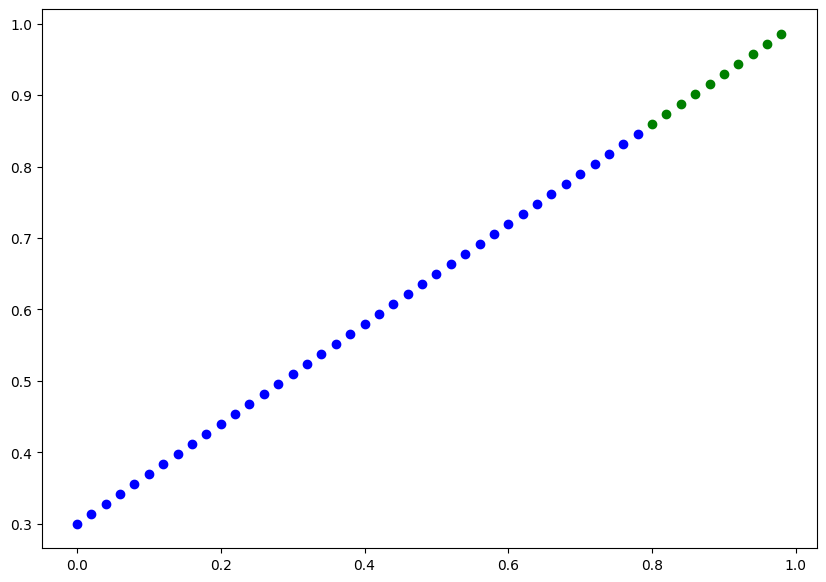

In [ ]:
plot_predection(X_train, y_train, X_test, y_test)

Épique !

Maintenant, au lieu d'être de simples nombres sur une page, nos données forment une ligne droite.

> **Remarque :** C'est le moment idéal pour vous présenter la devise des explorateurs de données...  
> **"Visualiser, visualiser, visualiser !"**  
> Gardez cette idée en tête chaque fois que vous travaillez avec des données et que vous les transformez en nombres.  
> Si vous pouvez visualiser quelque chose, cela peut grandement améliorer votre compréhension.  
>  
> Les machines adorent les nombres, et nous, les humains, les aimons aussi... mais nous aimons aussi voir les choses.

---

## 2. Construire le modèle

Nous avons maintenant des données, alors construisons un modèle capable d'utiliser les points bleus pour prédire les points verts.

Nous allons plonger directement dans le code.

Nous allons d'abord écrire le code, puis tout expliquer.

Reproduisons un modèle de régression linéaire standard en utilisant uniquement PyTorch.


In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,requires_grad= True, dtype= torch.float))

    self.bias = nn.Parameter(torch.rand(1,requires_grad= True, dtype= torch.float))

  def forward(self, X : torch.tensor):
      return self.weights *  X + self.bias

D'accord, il se passe pas mal de choses ci-dessus, alors décomposons tout étape par étape.

> **Ressource :** Nous allons utiliser des classes Python pour créer des composants permettant de construire des réseaux de neurones.  
> Si vous n'êtes pas familier avec la notation des classes en Python, je vous recommande de lire plusieurs fois le guide [Programmation orientée objet en Python 3 de Real Python](https://realpython.com/python3-object-oriented-programming/).


### Éléments essentiels pour la construction d'un modèle PyTorch

PyTorch dispose de quatre modules essentiels (plus ou moins) qui permettent de créer presque n'importe quel type de réseau de neurones.

Ces modules sont [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) et [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html).  
Pour l’instant, nous nous concentrerons sur les deux premiers et aborderons les deux autres plus tard (bien que vous puissiez deviner leur utilité).

| **Module PyTorch** | **Fonctionnalité** |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contient tous les éléments nécessaires à la création de graphes computationnels (une série de calculs exécutés d'une manière spécifique). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stocke des tenseurs utilisés avec `nn.Module`. Si `requires_grad=True`, les gradients (utilisés pour mettre à jour les paramètres du modèle via la [descente de gradient](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) sont calculés automatiquement, ce qui est souvent appelé "autograd". |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | Classe de base pour tous les modules de réseau de neurones. Tous les blocs de construction des réseaux de neurones en sont des sous-classes. Si vous construisez un réseau de neurones en PyTorch, vos modèles doivent hériter de `nn.Module` et définir une méthode `forward()`. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contient divers algorithmes d'optimisation (ils indiquent aux paramètres stockés dans `nn.Parameter` comment évoluer pour améliorer la descente de gradient et ainsi réduire la perte). |
| `def forward()` | Toutes les sous-classes de `nn.Module` doivent définir une méthode `forward()`, qui spécifie les calculs appliqués aux données passées à ce module (exemple : la formule de régression linéaire). |

Si cela vous semble complexe, simplifions les choses : presque tout dans un réseau de neurones PyTorch provient de `torch.nn`.

- `nn.Module` contient les blocs de construction principaux (les couches).
- `nn.Parameter` contient les plus petits paramètres comme les poids et les biais (qui forment des `nn.Module` en étant assemblés).
- `forward()` définit comment les blocs effectuent les calculs sur les entrées (tenseurs de données).
- `torch.optim` regroupe les méthodes d'optimisation qui ajustent les paramètres de `nn.Parameter` pour mieux représenter les données d'entrée.

![Un modèle linéaire PyTorch avec annotations]
*Éléments de base pour la création d'un modèle PyTorch en héritant de `nn.Module`. Les objets qui en héritent doivent définir une méthode `forward()`.*

> **Ressource :** Découvrez plus de ces modules essentiels et leurs cas d'utilisation dans le [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).


### 🔍 Vérification du contenu du modèle PyTorch

Maintenant que nous avons réglé cela, créons une instance du modèle avec la classe que nous avons définie et examinons ses paramètres en utilisant la méthode [.parameters()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

Nous pouvons également obtenir l'état (ce que contient le modèle) en utilisant
[`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

Remarquez comment les valeurs de `weights` et `bias` dans `model_0.state_dict()` sont des tenseurs de nombres flottants aléatoires ?

C'est parce que nous les avons initialisés précédemment en utilisant `torch.randn()`.

En gros, nous voulons commencer avec des paramètres aléatoires et amener le modèle à les mettre à jour vers des paramètres qui s'ajustent le mieux à nos données
(les valeurs de `weight` et `bias` que nous avons définies lors de la création de notre droite).

> **Exercice :** Essayez de modifier la valeur de `torch.manual_seed()` dans la cellule deux niveaux au-dessus et observez ce qui se passe avec les valeurs de poids et de biais.

Comme notre modèle démarre avec des valeurs aléatoires, il aura pour l'instant un faible pouvoir prédictif.


### Faire des prédictions avec `torch.inference_mode()`

Pour vérifier cela, nous pouvons passer les données de test `X_test` à notre modèle afin de voir à quel point ses prédictions sont proches de `y_test`.

Lorsque nous fournissons des données à notre modèle, celles-ci passent par la méthode `forward()` du modèle et génèrent un résultat en suivant le calcul que nous avons défini.

Faisons quelques prédictions.


In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])



Hmm ?

Vous avez probablement remarqué que nous avons utilisé [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) en tant que [gestionnaire de contexte](https://realpython.com/python-with-statement/) (c'est ce que signifie `with torch.inference_mode():`) pour effectuer les prédictions.

Comme son nom l'indique, `torch.inference_mode()` est utilisé lorsque l'on effectue des inférences (prédictions) avec un modèle.

`torch.inference_mode()` désactive plusieurs fonctionnalités (comme le suivi des gradients, qui est essentiel pour l'entraînement mais inutile pour l'inférence) afin d'accélérer les **passes avant** (les données passant par la méthode `forward()`).

> **Remarque :** Dans les anciens codes PyTorch, vous pourriez voir `torch.no_grad()` utilisé pour l'inférence. Bien que `torch.inference_mode()` et `torch.no_grad()` aient des fonctionnalités similaires, `torch.inference_mode()` est plus récent, potentiellement plus rapide et recommandé. Voir ce [Tweet de PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) pour plus de détails.

Nous avons effectué quelques prédictions, voyons maintenant à quoi elles ressemblent.


In [ ]:
print(f"X_test = {len(X_test)}")
print(f"y_preds = {len(y_preds)}")

X_test = 10
y_preds = 10


Remarquez comment il y a une valeur de prédiction pour chaque échantillon de test.

Cela est dû au type de données que nous utilisons. Pour notre ligne droite, une valeur `X` correspond à une seule valeur `y`.

Cependant, les modèles d'apprentissage automatique sont très flexibles. Vous pourriez avoir 100 valeurs `X` correspondant à une, deux, trois ou même dix valeurs `y`. Tout dépend du problème sur lequel vous travaillez.

Nos prédictions sont encore simplement des nombres affichés, visualisons-les avec notre fonction `plot_predictions()` que nous avons créée plus haut.

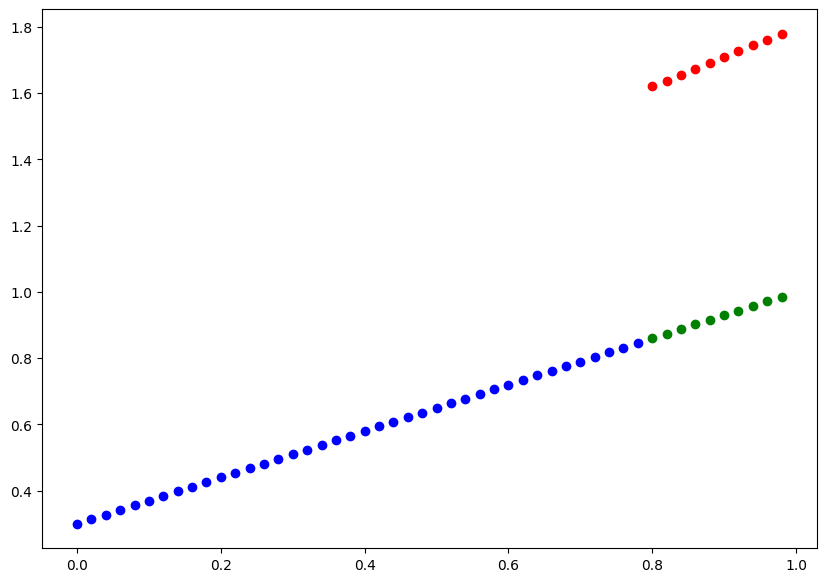

In [ ]:
plot_predection(X_train,y_train,X_test,y_test,y_preds)

In [ ]:
y_test - y_preds

tensor([[-0.7608],
        [-0.7645],
        [-0.7681],
        [-0.7718],
        [-0.7754],
        [-0.7790],
        [-0.7827],
        [-0.7863],
        [-0.7900],
        [-0.7936]])

### Oups ! Ces prédictions sont mauvaises...

Ces résultats ne sont pas surprenants si l'on se rappelle que notre modèle utilise des valeurs de paramètres aléatoires pour faire ses prédictions.

Il n'a même pas encore observé les points bleus pour essayer de prédire les points verts.

Il est temps de changer cela !


## 3. Entraîner le modèle

Actuellement, notre modèle fait des prédictions en utilisant des paramètres aléatoires pour effectuer ses calculs, il devine essentiellement au hasard.

Pour remédier à cela, nous pouvons mettre à jour ses paramètres internes (*weights* et *bias*), que nous avons initialisés aléatoirement avec `nn.Parameter()` et `torch.randn()`, afin qu'ils représentent mieux les données.

Nous pourrions coder ces valeurs en dur (puisque nous connaissons les valeurs idéales `weight=0.7` et `bias=0.2`), mais cela ne serait pas très intéressant.

La plupart du temps, nous ne connaissons pas les paramètres idéaux d’un modèle.

Il est donc bien plus utile de créer un code qui permet au modèle d’apprendre à ajuster ses paramètres tout seul.


### Création d'une fonction de perte et d'un optimiseur dans PyTorch

Pour permettre à notre modèle de mettre à jour ses paramètres tout seul, nous devons ajouter deux éléments supplémentaires :

- Une **fonction de perte** (*loss function*)
- Un **optimiseur** (*optimizer*)

Leur rôle est le suivant :

| Fonction | Rôle | Où la trouver dans PyTorch ? | Exemples courants |
|----------|------|-----------------------------|--------------------|
| **Fonction de perte** | Mesure à quel point les prédictions du modèle (`y_preds`) sont incorrectes par rapport aux valeurs réelles (`y_test`). Plus la perte est faible, mieux c'est. | [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions) | Erreur absolue moyenne (MAE) pour les problèmes de régression : [`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html). Entropie croisée binaire pour la classification binaire : [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html). |
| **Optimiseur** | Indique au modèle comment mettre à jour ses paramètres internes afin de minimiser la perte. | [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Descente de gradient stochastique (SGD) : [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD). Optimiseur Adam : [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam). |

Nous allons maintenant créer une fonction de perte et un optimiseur pour améliorer notre modèle.

Le choix de la fonction de perte et de l’optimiseur dépend du type de problème à résoudre.

Cependant, il existe des valeurs courantes qui fonctionnent bien :

- L'optimiseur **SGD** (*Stochastic Gradient Descent*) ou **Adam**.
- La fonction de perte **MAE** (*Mean Absolute Error*) pour les problèmes de régression (prédiction d’un nombre).
- La fonction de perte **Binary Cross Entropy** pour les problèmes de classification binaire (prédiction d’une catégorie ou d’une autre).

Dans notre cas, comme nous essayons de prédire un nombre, nous allons utiliser **MAE** (`torch.nn.L1Loss()`) comme fonction de perte.

![Visualisation de la perte MAE](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*L'erreur absolue moyenne (MAE, dans PyTorch : `torch.nn.L1Loss`) mesure la différence absolue entre deux points (prédictions et valeurs réelles), puis prend la moyenne sur l’ensemble des exemples.*

Nous allons utiliser **SGD** avec `torch.optim.SGD(params, lr)`, où :

- `params` représente les paramètres du modèle à optimiser (par exemple, les `weights` et `bias` que nous avons initialisés aléatoirement).
- `lr` (*learning rate*) est le **taux d’apprentissage**, qui indique la vitesse à laquelle l’optimiseur met à jour les paramètres :
  - Une valeur élevée signifie que l’optimiseur effectue de grands ajustements (mais cela peut être trop instable).
  - Une valeur faible signifie que l’optimiseur effectue de petits ajustements (mais cela peut être trop lent).
  - Le taux d’apprentissage est un **hyperparamètre**, c'est-à-dire un paramètre défini par l'ingénieur en machine learning.
  - Les valeurs courantes sont `0.01`, `0.001`, `0.0001`.
  - Il est aussi possible d’ajuster dynamiquement le taux d’apprentissage au fil du temps (cela s’appelle le [scheduling du taux d’apprentissage](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

Voyons maintenant tout cela en code !


In [ ]:
torch.manual_seed(43)
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### Création d'une boucle d'optimisation dans PyTorch

Hourra ! Nous avons maintenant une fonction de perte et un optimiseur, il est donc temps de créer une **boucle d'entraînement** (et une **boucle de test**).

- La **boucle d'entraînement** permet au modèle de parcourir les données d'entraînement et d'apprendre les relations entre les `features` et les `labels`.
- La **boucle de test** permet d'évaluer comment les modèles générés lors de l'entraînement se comportent sur des données inédites (les données de test, que le modèle n'a jamais vues pendant l'entraînement).

Ces boucles sont appelées ainsi car nous voulons que notre modèle passe en revue (*loop through*) chaque échantillon de chaque ensemble de données.

Pour créer ces boucles, nous allons écrire une boucle `for` en Python, en suivant le thème de la [chanson non officielle de la boucle d'optimisation PyTorch]

**Couplet 1**  
Passe en avant,  -- for epoch in range(epochs):
Calcule la perte,  --
On remet à zéro,  
On recule un peu !  
Pas à pas, l'optimiseur,  
Fait bouger les poids,  
Youpi ! Ça marche mieux !  
C’est parti pour le test ! 🎉

**Couplet 2**  
Sans les gradients,  
On regarde calmement,  
La perte descend,  
Tout doucement...  
Encore un pass,  
Et hop ça baisse !  
Bravo p’tit réseau,  
T’es un héros ! 🦸‍♂️


*La chanson non officielle des boucles d'optimisation PyTorch, une manière amusante de retenir les étapes d'une boucle d'entraînement (et de test) dans PyTorch.*

Il y aura pas mal de code, mais rien que nous ne puissions gérer !


### Boucle de test dans PyTorch

Quant à la boucle de test (évaluation de notre modèle), les étapes typiques incluent :

| Numéro | Nom de l'étape | Rôle | Exemple de code |
| ----- | ----- | ----- | ----- |
| 1 | Passage avant (*Forward pass*) | Le modèle parcourt toutes les données de test une seule fois en effectuant les calculs définis dans sa fonction `forward()`. | `model(x_test)` |
| 2 | Calcul de la perte | Les sorties du modèle (prédictions) sont comparées aux valeurs réelles et évaluées pour mesurer l'erreur. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Calcul des métriques d'évaluation (optionnel) | En plus de la valeur de la perte, on peut calculer d'autres métriques comme la précision sur l'ensemble de test. | Fonctions personnalisées |

Remarquez que la boucle de test ne contient pas d'étapes de rétropropagation (`loss.backward()`) ni de mise à jour de l'optimiseur (`optimizer.step()`). En effet, aucun paramètre du modèle ne change pendant le test, car ils ont déjà été entraînés. Lors du test, nous nous intéressons uniquement aux résultats du passage avant du modèle.


Regroupons tout cela et entraînons notre modèle sur **100 époques** (passages avant à travers les données), en l'évaluant toutes les 10 époques.


In [ ]:
torch.manual_seed(43)
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    loss_test = loss_fn(test_pred,y_test)

    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(loss_test.detach().numpy())
    epoch_count.append(epoch)

    if epoch % 10 == 0:
      print(f"epoch : {epoch}, loss_train : {loss}, test_loss: {loss_test}")


epoch : 0, loss_train : 0.19946113228797913, test_loss: 0.309006005525589
epoch : 10, loss_train : 0.08425117284059525, test_loss: 0.17429609596729279
epoch : 20, loss_train : 0.0357610359787941, test_loss: 0.0950789824128151
epoch : 30, loss_train : 0.030039316043257713, test_loss: 0.07197971642017365
epoch : 40, loss_train : 0.026550158858299255, test_loss: 0.06164653226733208
epoch : 50, loss_train : 0.02312171831727028, test_loss: 0.05337398126721382
epoch : 60, loss_train : 0.01968449354171753, test_loss: 0.045101433992385864
epoch : 70, loss_train : 0.016248222440481186, test_loss: 0.037515789270401
epoch : 80, loss_train : 0.0128196831792593, test_loss: 0.0292432252317667
epoch : 90, loss_train : 0.009380879811942577, test_loss: 0.020970696583390236


Oh, regardez ça ! Il semble que notre perte diminue à chaque époque. Traçons-la pour voir l'évolution.


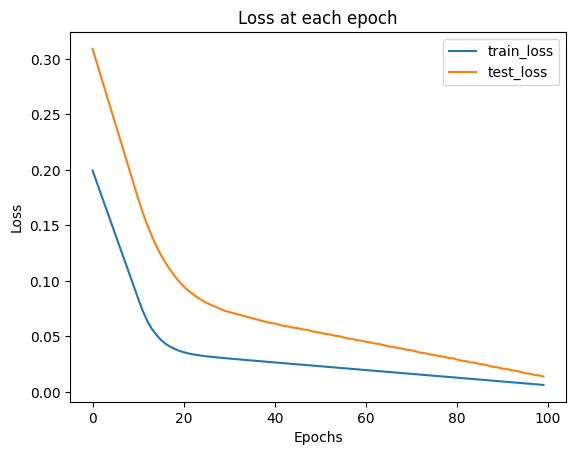

In [ ]:
plt.plot(epoch_count, train_loss_values, label = "train_loss")
plt.plot(epoch_count, test_loss_values, label = "test_loss")
plt.title("Loss at each epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Super ! Les **courbes de perte** montrent que la perte diminue au fil du temps. Rappelez-vous, la perte mesure à quel point votre modèle se trompe, donc plus elle est basse, mieux c'est.

Mais pourquoi la perte a-t-elle diminué ?

Grâce à notre fonction de perte et à notre optimiseur, les paramètres internes du modèle (`weights` et `bias`) ont été mis à jour pour mieux refléter les motifs sous-jacents des données.

Inspectons le [`state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) de notre modèle pour voir à quel point ses valeurs se rapprochent de celles que nous avions initialement définies pour les poids et le biais.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6705])), ('bias', tensor([0.3125]))])

Wow ! C'est incroyable, n'est-ce pas ?

Notre modèle s'est rapproché du calcul des valeurs exactes de `weight` et `bias` (et il pourrait probablement s'en rapprocher encore plus si nous l'entraînions plus longtemps).

> **Exercice :** Essayez de changer la valeur de `epochs` à 200. Que se passe-t-il avec les courbes de perte et les paramètres `weights` et `bias` du modèle ?

Il est peu probable qu'il les devine *parfaitement* (surtout avec des ensembles de données plus complexes), mais ce n'est pas un problème. Souvent, une approximation proche est suffisante pour obtenir des résultats impressionnants.

C'est tout le principe de l'apprentissage automatique et de l'apprentissage profond : **il existe des valeurs idéales qui décrivent nos données**, et plutôt que de les déterminer manuellement, **nous pouvons entraîner un modèle à les trouver automatiquement**.

## 4. Faire des prédictions avec un modèle PyTorch entraîné (inférence)

Une fois que vous avez entraîné un modèle, vous voudrez probablement faire des prédictions avec.

Nous avons déjà eu un aperçu de cela dans le code d'entraînement et de test ci-dessus. Les étapes pour le faire en dehors des boucles d'entraînement/test sont similaires.

Voici trois choses importantes à retenir lors de la réalisation de prédictions (également appelée inférence) avec un modèle PyTorch :

1. Mettre le modèle en mode évaluation (`model.eval()`).
2. Faire les prédictions avec le gestionnaire de contexte du mode inférence (`with torch.inference_mode(): ...`).
3. S'assurer que toutes les prédictions sont faites avec des objets sur le même appareil (par exemple, les données et le modèle doivent être sur le GPU uniquement ou sur le CPU uniquement).

Les deux premiers points garantissent que tous les calculs et paramètres internes utilisés par PyTorch lors de l'entraînement, mais qui ne sont pas nécessaires pour l'inférence, sont désactivés (ce qui accélère les calculs). Le troisième point permet d'éviter les erreurs dues à des incompatibilités entre les appareils.


In [ ]:
# 1. Mettre le modèle en mode évaluation
model_0.eval()

# 2. Configurer le gestionnaire de contexte pour le mode inférence
with torch.inference_mode():
  # 3. S'assurer que les calculs sont effectués avec le modèle et les données sur le même appareil
  # Dans notre cas, nous n'avons pas encore configuré un code indépendant de l'appareil,
  # donc nos données et notre modèle sont par défaut sur le CPU.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds


tensor([[0.8489],
        [0.8623],
        [0.8757],
        [0.8891],
        [0.9025],
        [0.9159],
        [0.9293],
        [0.9427],
        [0.9561],
        [0.9695]])

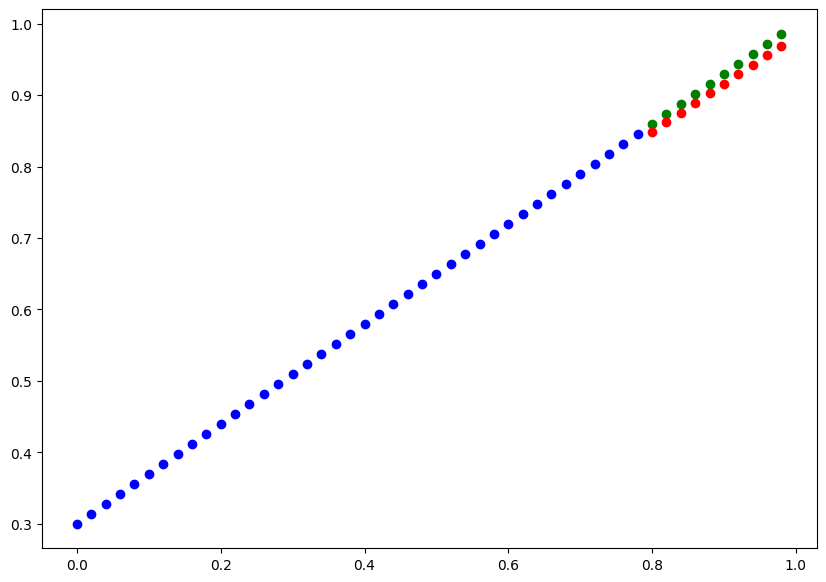

In [ ]:
plot_predection(X_train,y_train, X_test, y_test,predictions=y_preds)

Woohoo ! Ces points rouges sont bien plus proches qu'avant !  

Passons maintenant à la sauvegarde et au rechargement d'un modèle dans PyTorch.


## 5. Sauvegarde et chargement d'un modèle PyTorch

Si vous avez entraîné un modèle PyTorch, il y a de fortes chances que vous souhaitiez le sauvegarder et l'exporter ailleurs.

Par exemple, vous pourriez l'entraîner sur Google Colab ou sur votre machine locale avec un GPU, puis vouloir l'utiliser dans une application accessible aux autres utilisateurs.

Ou bien, vous souhaitez enregistrer votre progression sur un modèle et pouvoir le charger plus tard.

Pour sauvegarder et charger des modèles dans PyTorch, voici les trois méthodes principales à connaître (toutes issues du [guide officiel de PyTorch sur la sauvegarde et le chargement des modèles](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)) :

| Méthode PyTorch | Description |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Sauvegarde un objet sérialisé sur le disque en utilisant l’utilitaire [`pickle`](https://docs.python.org/3/library/pickle.html) de Python. Vous pouvez sauvegarder des modèles, des tenseurs et d'autres objets Python comme des dictionnaires avec `torch.save`. |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Utilise les fonctionnalités de désérialisation de `pickle` pour charger des fichiers Python sauvegardés (modèles, tenseurs, dictionnaires) en mémoire. Vous pouvez également spécifier sur quel appareil charger l'objet (CPU, GPU, etc.). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict) | Charge les paramètres d’un modèle (`model.state_dict()`) en utilisant un objet `state_dict()` sauvegardé. |

> **Remarque :** Comme mentionné dans la [documentation Python sur `pickle`](https://docs.python.org/3/library/pickle.html), le module `pickle` **n'est pas sécurisé**. Cela signifie que vous ne devez charger que des données provenant de sources fiables. Cela vaut également pour les modèles PyTorch. Utilisez uniquement des modèles sauvegardés en provenance de sources de confiance.

### Sauvegarde d'un `state_dict()` de modèle PyTorch

La [méthode recommandée](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) pour sauvegarder et charger un modèle pour l'inférence (faire des prédictions) est de sauvegarder et charger son `state_dict()`.

Voyons comment procéder en quelques étapes :

1. Créer un répertoire `models` pour sauvegarder les modèles en utilisant le module `pathlib` de Python.
2. Définir un chemin de fichier où sauvegarder le modèle.
3. Utiliser `torch.save(obj, f)` où `obj` est le `state_dict()` du modèle et `f` est le nom du fichier où enregistrer le modèle.

> **Remarque :** Il est courant d'utiliser les extensions `.pt` ou `.pth` pour les fichiers de modèles sauvegardés avec PyTorch, par exemple `saved_model_01.pth`.


In [ ]:
from pathlib import Path

MODEL_PATH = Path("Models")

MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_COUR_Pytorch_YOUTUBE.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model is saved in :{MODEL_SAVE_PATH}")

torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Model is saved in :Models/01_COUR_Pytorch_YOUTUBE.pth


### Chargement du `state_dict()` sauvegardé d'un modèle PyTorch

Maintenant que nous avons un `state_dict()` de modèle sauvegardé dans `models/01_pytorch_workflow_model_0.pth`, nous pouvons le charger en utilisant `torch.nn.Module.load_state_dict(torch.load(f))` où `f` est le chemin d'accès à notre `state_dict()` de modèle sauvegardé.

Pourquoi appeler `torch.load()` à l'intérieur de `torch.nn.Module.load_state_dict()` ?

Parce que nous avons seulement sauvegardé le `state_dict()` du modèle, qui est un dictionnaire de paramètres appris, et non le *modèle entier*, nous devons d'abord charger le `state_dict()` avec `torch.load()` et ensuite passer ce `state_dict()` à une nouvelle instance de notre modèle (qui est une sous-classe de `nn.Module`).

Pourquoi ne pas sauvegarder le modèle entier ?

[Sauvegarder le modèle entier](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) plutôt que seulement le `state_dict()` est plus intuitif, cependant, pour citer la documentation PyTorch (italique *ajouté*):

> Le désavantage de cette approche *(sauvegarder le modèle entier)* est que les données sérialisées sont liées aux classes spécifiques et à la structure de répertoire exacte utilisée lorsque le modèle est sauvegardé...
>
> À cause de cela, votre code peut se casser de diverses manières lorsqu'il est utilisé dans d'autres projets ou après des refactorisations.

Donc, à la place, nous utilisons la méthode flexible de sauvegarder et charger seulement le `state_dict()`, qui est, encore une fois, fondamentalement un dictionnaire de paramètres du modèle.

Testons cela en créant une autre instance de `LinearRegressionModel()`, qui est une sous-classe de `torch.nn.Module` et aura donc la méthode intégrée `load_state_dict()`.

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)

Load_model = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)

Load_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

Excellent ! Il semble que les choses correspondent.

Maintenant, pour tester notre modèle chargé, effectuons une inférence avec lui (faisons des prédictions) sur les données de test.

Vous souvenez-vous des règles pour effectuer une inférence avec les modèles PyTorch ?

Si non, voici un rappel :

<details>
    <summary>Règles d'inférence PyTorch</summary>
    <ol>
      <li> Mettre le modèle en mode évaluation (<code>model.eval()</code>). </li>
      <li> Faire les prédictions en utilisant le gestionnaire de contexte du mode inférence (<code>with torch.inference_mode(): ...</code>). </li>
      <li> Toutes les prédictions doivent être faites avec des objets sur le même appareil (par exemple, données et modèle sur GPU seulement ou données et modèle sur CPU seulement).</li>
    </ol>
</details>

In [ ]:
# 1. Put the loaded model into evaluation mode

with torch.inference_mode():
  load_y_preds = Load_model(X_test)
  y_preds = model_0(X_test)

# 2. Use the inference mode context manager to make predictions


Maintenant que nous avons fait des prédictions avec le modèle chargé, voyons si elles sont les mêmes que les prédictions précédentes.

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
load_y_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Super !

Il semble que les prédictions du modèle chargé soient les mêmes que les prédictions du modèle précédent (prédictions faites avant la sauvegarde). Cela indique que notre modèle se sauvegarde et se charge comme prévu.

> **Note :** Il existe d'autres méthodes pour sauvegarder et charger des modèles PyTorch, mais je les laisserai pour un apprentissage supplémentaire et une lecture plus approfondie. Consultez le [guide PyTorch pour sauvegarder et charger des modèles](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) pour en savoir plus.
## 6. Tout mettre ensemble

Nous avons couvert pas mal de terrain jusqu'à présent.

Mais une fois que vous aurez un peu pratiqué, vous effectuerez les étapes ci-dessus comme si vous dansiez dans la rue.

En parlant de pratique, rassemblons tout ce que nous avons fait jusqu'à présent.

Sauf que cette fois, nous rendrons notre code indépendant du périphérique (donc s'il y a un GPU disponible, il l'utilisera et sinon, il utilisera le CPU par défaut).

Il y aura beaucoup moins de commentaires dans cette section que ci-dessus, car ce que nous allons examiner a déjà été couvert.

Nous commencerons par importer les bibliothèques standard dont nous avons besoin.

> **Note :** Si vous utilisez Google Colab, pour configurer un GPU, allez dans Exécution -> Modifier le type d'exécution -> Accélérateur matériel -> GPU. Si vous faites cela, le runtime Colab sera réinitialisé et vous perdrez les variables sauvegardées.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

Maintenant, commençons à rendre notre code indépendant du périphérique en définissant `device="cuda"` s'il est disponible, sinon, il utilisera `device="cpu"` par défaut.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


Si vous avez accès à un GPU, ce qui précède aurait dû afficher :

Using device: cuda

Sinon, vous utiliserez un CPU pour les calculs suivants. C'est suffisant pour notre petit ensemble de données, mais cela prendra plus de temps pour les ensembles de données plus volumineux.
### 6.1 Données

Créons des données comme avant.

Tout d'abord, nous allons coder en dur certaines valeurs de `weight` et `bias`.

Ensuite, nous allons créer une plage de nombres entre 0 et 1, ce seront nos valeurs `X`.

Enfin, nous utiliserons les valeurs `X`, ainsi que les valeurs `weight` et `bias` pour créer `y` en utilisant la formule de régression linéaire (`y = weight * X + bias`).

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Magnifique !

Maintenant que nous avons des données, divisons-les en ensembles d'entraînement et de test.

Nous utiliserons une division 80/20 avec 80 % de données d'entraînement et 20 % de données de test.

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Excellent, visualisons-les pour nous assurer qu'elles sont correctes.

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

NameError: name 'plot_predictions' is not defined

### 6.2 Construction d'un modèle linéaire PyTorch

Nous avons des données, il est maintenant temps de créer un modèle.

Nous allons créer le même style de modèle qu'avant, sauf que cette fois, au lieu de définir manuellement les paramètres de poids et de biais de notre modèle en utilisant `nn.Parameter()`, nous utiliserons [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) pour le faire pour nous.

Où `in_features` est le nombre de dimensions de vos données d'entrée et `out_features` est le nombre de dimensions que vous souhaitez obtenir en sortie.

Dans notre cas, les deux sont `1` car nos données ont `1` caractéristique d'entrée (`X`) par étiquette (`y`).

![comparaison du modèle de régression linéaire nn.Parameter et du modèle de régression linéaire nn.Linear](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*Création d'un modèle de régression linéaire en utilisant `nn.Parameter` par rapport à l'utilisation de `nn.Linear`. Il existe de nombreux autres exemples où le module `torch.nn` a des calculs pré-construits, y compris de nombreuses couches de réseaux neuronaux populaires et utiles.*

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

Remarquez les sorties de `model_1.state_dict()`, la couche `nn.Linear()` a créé un paramètre `weight` et `bias` aléatoire pour nous.

Maintenant, mettons notre modèle sur le GPU (s'il est disponible).

Nous pouvons changer le périphérique sur lequel nos objets PyTorch se trouvent en utilisant `.to(device)`.

Vérifions d'abord le périphérique actuel du modèle.

In [ ]:
# Check model device
next(model_1.parameters()).device

Magnifique, il semble que le modèle soit sur le CPU par défaut.

Changeons-le pour qu'il soit sur le GPU (s'il est disponible).

In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

Super ! Grâce à notre code indépendant du périphérique, la cellule ci-dessus fonctionnera que le GPU soit disponible ou non.

Si vous avez accès à un GPU compatible CUDA, vous devriez voir une sortie ressemblant à ceci :

device(type='cuda', index=0)
### 6.3 Entraînement
Il est temps de construire une boucle d'entraînement et de test.

Nous aurons d'abord besoin d'une fonction de perte et d'un optimiseur.

Utilisons les mêmes fonctions que précédemment, `nn.L1Loss()` et `torch.optim.SGD()`.

Nous devrons passer les paramètres du nouveau modèle (`model.parameters()`) à l'optimiseur pour qu'il les ajuste pendant l'entraînement.

Le taux d'apprentissage de `0.01` a bien fonctionné auparavant, alors réutilisons-le.

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

Magnifique, la fonction de perte et l'optimiseur sont prêts, entraînons et évaluons maintenant notre modèle en utilisant une boucle d'entraînement et de test.

La seule chose différente que nous allons faire dans cette étape par rapport à la boucle d'entraînement précédente est de mettre les données sur le `device` cible.

Nous avons déjà mis notre modèle sur le `device` cible en utilisant `model_1.to(device)`.

Et nous pouvons faire de même avec les données.

De cette façon, si le modèle est sur le GPU, les données sont sur le GPU (et vice versa).

Passons à la vitesse supérieure cette fois et définissons `epochs=1000`.

Si vous avez besoin d'un rappel des étapes de la boucle d'entraînement PyTorch, voir ci-dessous.

<details>
    <summary>Étapes de la boucle d'entraînement PyTorch</summary>
    <ol>
        <li><b>Passe avant</b> - Le modèle parcourt toutes les données d'entraînement une fois, en effectuant ses
            calculs de la fonction <code>forward()</code>
            (<code>model(x_train)</code>).
        </li>
        <li><b>Calculer la perte</b> - Les sorties du modèle (prédictions) sont comparées à la vérité terrain et évaluées
            pour voir à quel point
            elles sont erronées (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zéro gradients</b> - Les gradients des optimiseurs sont mis à zéro (ils sont accumulés par défaut) afin qu'ils
            puissent être
            recalculés pour l'étape d'entraînement spécifique (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Effectuer une rétropropagation sur la perte</b> - Calcule le gradient de la perte par rapport à chaque paramètre du modèle
            à mettre à jour (chaque paramètre
            avec <code>requires_grad=True</code>). C'est ce qu'on appelle la <b>rétropropagation</b>, d'où "rétro"
            (<code>loss.backward()</code>).</li>
        <li><b>Étape de l'optimiseur (descente de gradient)</b> - Met à jour les paramètres avec <code>requires_grad=True</code>
            par rapport aux gradients de perte
            afin de les améliorer (<code>optimizer.step()</code>).</li>
    </ol>
</details>

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

> **Note :** En raison de la nature aléatoire de l'apprentissage automatique, vous obtiendrez probablement des résultats légèrement différents (différentes valeurs de perte et de prédiction) selon que votre modèle a été entraîné sur CPU ou GPU. Ceci est vrai même si vous utilisez la même graine aléatoire sur les deux périphériques. Si la différence est importante, vous voudrez peut-être rechercher des erreurs, cependant, si elle est faible (idéalement, elle l'est), vous pouvez l'ignorer.

Super ! Cette perte semble assez faible.

Vérifions les paramètres que notre modèle a appris et comparons-les aux paramètres originaux que nous avons codés en dur.

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

Ho ho ! C'est vraiment très proche d'un modèle parfait.

Rappelez-vous cependant, en pratique, il est rare que vous connaissiez les paramètres parfaits à l'avance.

Et si vous connaissiez les paramètres que votre modèle devait apprendre à l'avance, quel serait l'intérêt de l'apprentissage automatique ?

De plus, dans de nombreux problèmes d'apprentissage automatique du monde réel, le nombre de paramètres peut largement dépasser des dizaines de millions.

Je ne sais pas pour vous, mais je préférerais écrire du code pour qu'un ordinateur trouve ces paramètres plutôt que de le faire à la main.
### 6.4 Faire des prédictions

Maintenant que nous avons un modèle entraîné, activons son mode d'évaluation et faisons quelques prédictions.

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

Si vous faites des prédictions avec des données sur le GPU, vous remarquerez peut-être que la sortie ci-dessus a `device='cuda:0'` vers la fin. Cela signifie que les données sont sur le périphérique CUDA 0 (le premier GPU auquel votre système a accès en raison de l'indexation à zéro), si vous finissez par utiliser plusieurs GPU à l'avenir, ce nombre peut être plus élevé.

Maintenant, traçons les prédictions de notre modèle.

> **Note :** De nombreuses bibliothèques de science des données telles que pandas, matplotlib et NumPy ne sont pas capables d'utiliser des données stockées sur le GPU. Vous pourriez donc rencontrer des problèmes lorsque vous essayez d'utiliser une fonction de l'une de ces bibliothèques avec des données tensor non stockées sur le CPU. Pour résoudre ce problème, vous pouvez appeler [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) sur votre tenseur cible pour retourner une copie de votre tenseur cible sur le CPU.

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

Ouah ! Regardez ces points rouges, ils s'alignent presque parfaitement avec les points verts. Je suppose que les epochs supplémentaires ont aidé.

### 6.5 Sauvegarde et chargement d'un modèle

Nous sommes satisfaits des prédictions de nos modèles, alors sauvegardons-le dans un fichier afin qu'il puisse être utilisé ultérieurement.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Et juste pour s'assurer que tout a bien fonctionné, rechargeons-le.

Nous allons :
* Créer une nouvelle instance de la classe `LinearRegressionModelV2()`
* Charger le dictionnaire d'état du modèle en utilisant `torch.nn.Module.load_state_dict()`
* Envoyer la nouvelle instance du modèle vers le périphérique cible (pour s'assurer que notre code est indépendant du périphérique)

In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Maintenant, nous pouvons évaluer le modèle chargé pour voir si ses prédictions correspondent aux prédictions faites avant la sauvegarde.

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

Tout s'additionne ! Super !

Eh bien, nous avons fait beaucoup de chemin. Vous avez maintenant construit et entraîné vos deux premiers modèles de réseaux neuronaux dans PyTorch !

Il est temps de mettre vos compétences en pratique.

## Exercices

Tous les exercices ont été inspirés du code présent dans ce notebook.

Il y a un exercice par section principale.

Vous devriez être capable de les réaliser en vous référant à leur section spécifique.

> **Note :** Pour tous les exercices, votre code doit être indépendant du périphérique (ce qui signifie qu'il pourrait fonctionner sur CPU ou GPU si disponible).

1. Créez un ensemble de données en ligne droite en utilisant la formule de régression linéaire (`weight * X + bias`).
  * Définissez `weight=0.3` et `bias=0.9`, il devrait y avoir au moins 100 points de données au total.
  * Divisez les données en 80 % d'entraînement et 20 % de test.
  * Tracez les données d'entraînement et de test afin de les visualiser.
2. Construisez un modèle PyTorch en sous-classant `nn.Module`.
  * À l'intérieur, il devrait y avoir un `nn.Parameter()` initialisé aléatoirement avec `requires_grad=True`, un pour les `weights` et un pour le `bias`.
  * Implémentez la méthode `forward()` pour calculer la fonction de régression linéaire que vous avez utilisée pour créer l'ensemble de données en 1.
  * Une fois que vous avez construit le modèle, créez-en une instance et vérifiez son `state_dict()`.
  * **Note :** Si vous souhaitez utiliser `nn.Linear()` au lieu de `nn.Parameter()`, vous pouvez le faire.
3. Créez une fonction de perte et un optimiseur en utilisant respectivement `nn.L1Loss()` et `torch.optim.SGD(params, lr)`.
  * Définissez le taux d'apprentissage de l'optimiseur à 0.01 et les paramètres à optimiser doivent être les paramètres du modèle que vous avez créé en 2.
  * Écrivez une boucle d'entraînement pour effectuer les étapes d'entraînement appropriées pendant 300 epochs.
  * La boucle d'entraînement doit tester le modèle sur l'ensemble de données de test toutes les 20 epochs.
4. Faites des prédictions avec le modèle entraîné sur les données de test.
  * Visualisez ces prédictions par rapport aux données d'entraînement et de test originales (**note :** vous devrez peut-être vous assurer que les prédictions ne sont *pas* sur le GPU si vous voulez utiliser des bibliothèques non compatibles CUDA telles que matplotlib pour tracer).
5. Sauvegardez le `state_dict()` de votre modèle entraîné dans un fichier.
  * Créez une nouvelle instance de la classe de votre modèle que vous avez créée en 2 et chargez-y le `state_dict()` que vous venez de sauvegarder.
  * Effectuez des prédictions sur vos données de test avec le modèle chargé et confirmez qu'elles correspondent aux prédictions du modèle original de l'étape 4.

> **Ressource :** Consultez les [modèles de notebooks d'exercices](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises) et les [solutions](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) sur le GitHub du cours.

## Pour aller plus loin
* Écoutez [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) (pour vous aider à vous souvenir des étapes d'une boucle d'entraînement/test PyTorch).
* Lisez [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html) de Jeremy Howard pour une compréhension plus approfondie du fonctionnement de l'un des modules les plus importants de PyTorch.
* Passez 10 minutes à parcourir et à consulter l'[antisèche de la documentation PyTorch](https://pytorch.org/tutorials/beginner/ptcheat.html) pour tous les différents modules PyTorch que vous pourriez rencontrer.
* Passez 10 minutes à lire la [documentation sur le chargement et la sauvegarde sur le site web de PyTorch](https://pytorch.org/tutorials/beginner/saving_loading_models.html) pour vous familiariser avec les différentes options de sauvegarde et de chargement dans PyTorch.
* Passez 1 à 2 heures à lire/regarder ce qui suit pour un aperçu du fonctionnement interne de la descente de gradient et de la rétropropagation, les deux principaux algorithmes qui ont fonctionné en arrière-plan pour aider notre modèle à apprendre.
 * [Page Wikipédia pour la descente de gradient](https://en.wikipedia.org/wiki/Gradient_descent)
 * [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) par Robert Kwiatkowski
 * [Gradient descent, how neural networks learn video](https://youtu.be/IHZwWFHWa-w) par 3Blue1Brown
 * [What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U) vidéo par 3Blue1Brown
 * [Page Wikipédia sur la rétropropagation](https://en.wikipedia.org/wiki/Backpropagation)